In [1]:
#STEP 1 : IMPORTING ALL THE REQUIRED LIBRARIES
import numpy as np #imports the NumPy library and assigns it the alias np
import matplotlib.pyplot as plt #imports the pyplot module from the matplotlib library and assigns it the alias plt
import pandas as pd # imports the Pandas library and assigns it the alias pd
from sklearn.preprocessing import StandardScaler # imports the StandardScaler class from the sklearn.preprocessing module
from sklearn.model_selection import train_test_split  #imports the train_test_split function from the sklearn.model_selection module
import tensorflow as tf #imports the TensorFlow library and assigns it the alias tf
from tensorflow.keras.models import Sequential #imports the Sequential class from the tensorflow.keras.models module
from tensorflow.keras.layers import Dense, LSTM, Dropout #imports the three layers i.e., Dense, LSTM and Dropout from the tensorflow.keras.layers modules
from tensorflow.keras.callbacks import EarlyStopping  #imports the EarlyStopping callback from the tensorflow.keras.callbacks module
from sklearn.metrics import mean_squared_error #imports the mean_squared_error function from the sklearn.metrics module
import datetime #Python library for working with dates and times
import matplotlib.dates as mdates #functionality for formatting and manipulating dates on plots

In [2]:
#STEP 2 : READING THE DOWNLOADED DATASET USING THE PANDAS LIBRARY
netflix = pd.read_csv("Downloads/NFLX.csv", index_col='Date') # read a csv file with Date column as the index of the DataFrame

In [3]:
#STEP 3 : DISPLAY THE DATA
netflix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,61.347141,61.767143,60.611427,61.491428,61.491428,13812400
2014-02-11,61.422855,62.251431,60.787144,61.998569,61.998569,13667500
2014-02-12,62.111427,62.128571,60.791428,61.275715,61.275715,15673000
2014-02-13,60.812859,62.784286,60.714287,62.364285,62.364285,18700500
2014-02-14,62.437141,62.528572,61.669998,62.215714,62.215714,11985400
...,...,...,...,...,...,...
2024-02-01,567.020020,572.659973,563.830017,567.510010,567.510010,3174000
2024-02-02,564.520020,567.799988,562.369995,564.640015,564.640015,4030800
2024-02-05,562.469971,575.750000,557.200012,562.059998,562.059998,4143100


In [4]:
netflix.info()  # getting information about the structure and properties of the Dataset netflix

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2014-02-10 to 2024-02-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


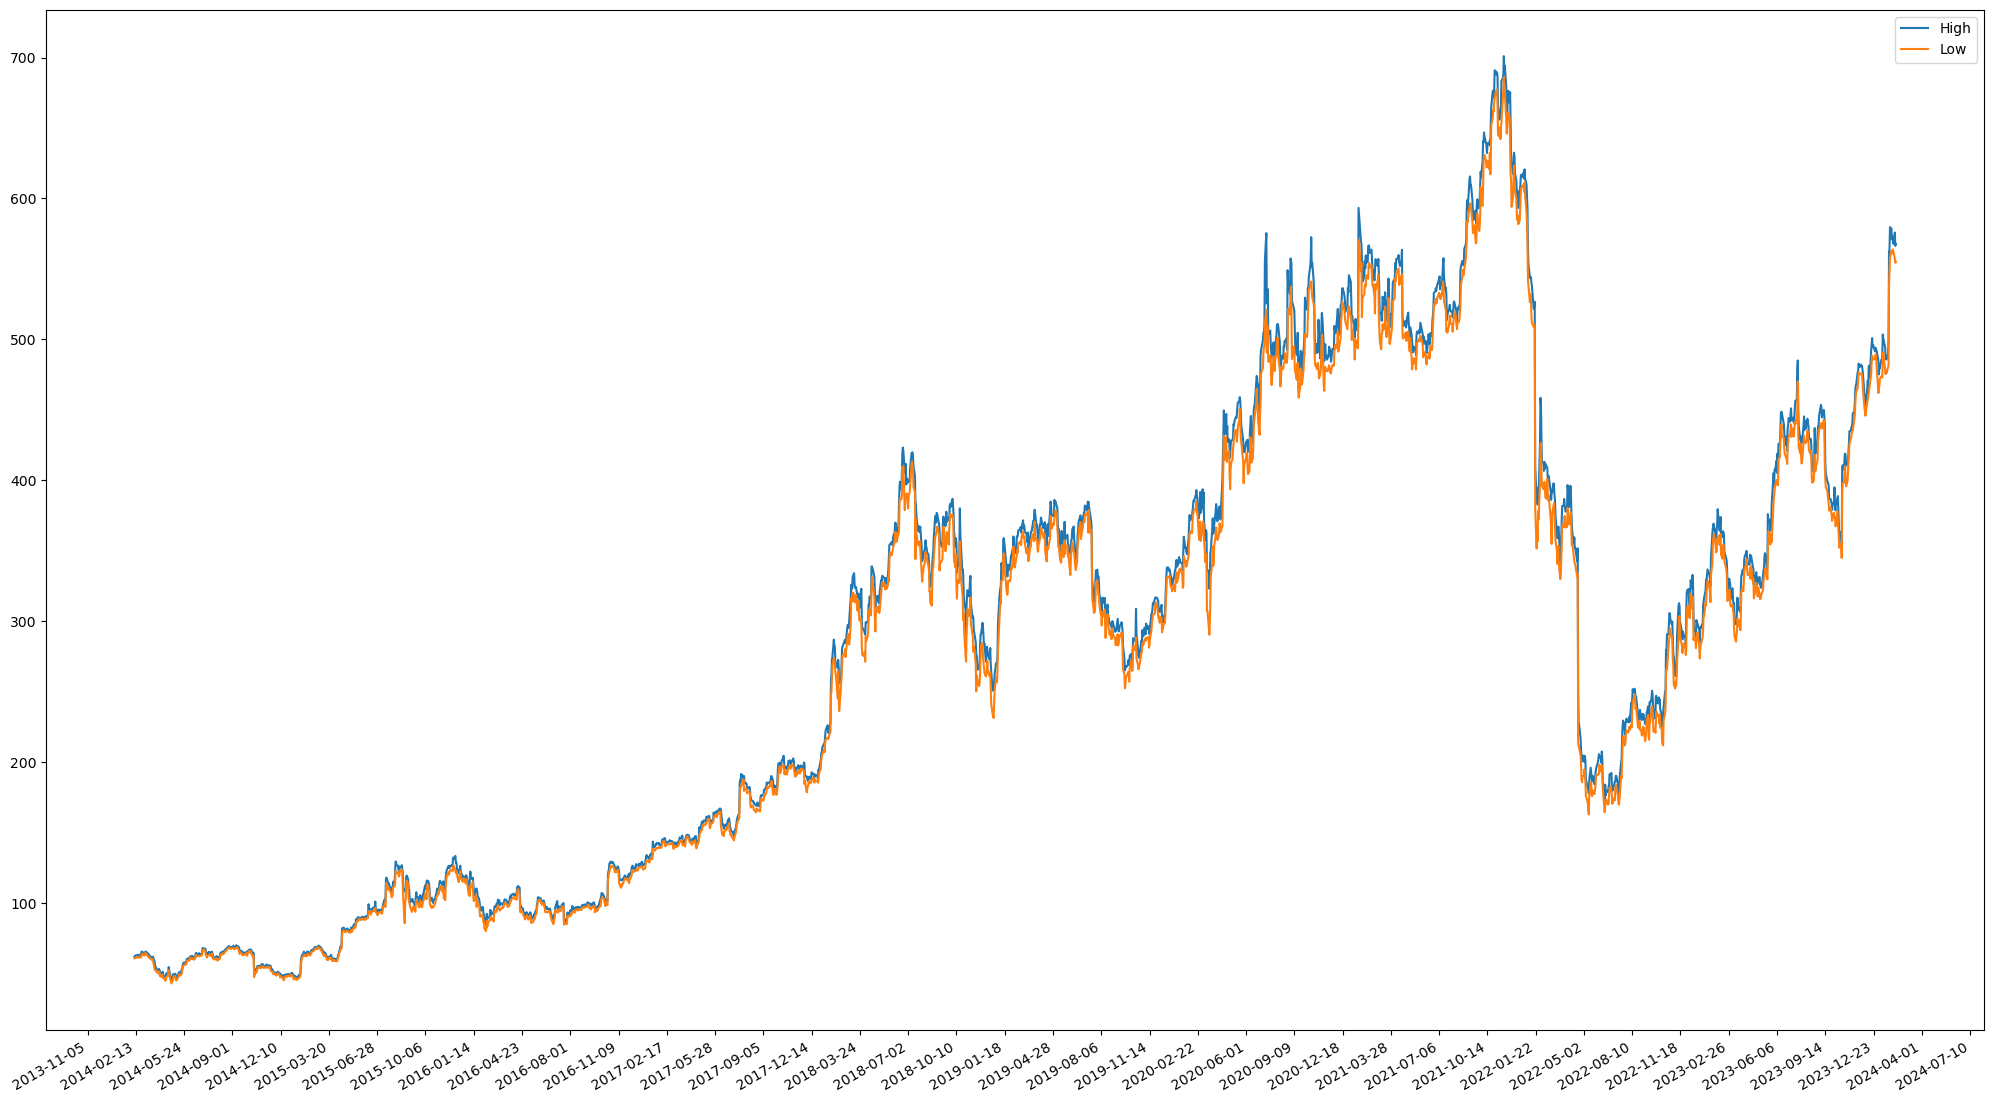

In [5]:
#STEP 4 : PLOTTING THE GRAPH OF HIGH AND LOW VALUES OF THE STOCK

plt.figure(figsize=(25,15)) #create a new figure for a plot with a specified size
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #configuring the x-axis to display dates in the format YYYY-MM-DD
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100)) #configuring the x-axis to have major ticks at intervals of 100 days
netflix_dates = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in netflix.index.values] #creates a list by converting the date strings in the index of a DataFrame into datetime objects


plt.plot(netflix_dates, netflix['High'], label = 'High') #plots the High values from the netflix
plt.plot(netflix_dates, netflix['Low'], label = 'Low') #plots the Low values from the netflix
plt.legend() #display the legend
plt.gcf().autofmt_xdate() #format the date labels on the x-axis in a way that optimally fits the available space
plt.show() #display the Matplotlib plot

In [6]:
#STEP 5 : CREATING X & Y VARIABLES 
X = netflix.iloc[:, 0:3] #creates a new DataFrame X by selecting columns from the existing netflix DataFrame
Y = netflix['Close'] #creates a new Series Y by extracting the 'Close' column from the DataFrame netflix
X #prints X
Y #prints Y 

Date
2014-02-10     61.491428
2014-02-11     61.998569
2014-02-12     61.275715
2014-02-13     62.364285
2014-02-14     62.215714
                 ...    
2024-02-01    567.510010
2024-02-02    564.640015
2024-02-05    562.059998
2024-02-06    555.880005
2024-02-07    559.299988
Name: Close, Length: 2516, dtype: float64

In [7]:
X.iloc[:,0:]  #select all rows and columns starting from index 0 and continuing to the end

,Open,High,Low
Date,,,
2014-02-10,61.347141,61.767143,60.611427
2014-02-11,61.422855,62.251431,60.787144
2014-02-12,62.111427,62.128571,60.791428
2014-02-13,60.812859,62.784286,60.714287
2014-02-14,62.437141,62.528572,61.669998
...,...,...,...
2024-02-01,567.020020,572.659973,563.830017
2024-02-02,564.520020,567.799988,562.369995
2024-02-05,562.469971,575.750000,557.200012


In [8]:
X.values.shape #get the shape of X

(2516, 3)

In [9]:
#STEP 6 : STANDARDISING THE VALUES OF X USING STANDARDSALER LIBRARY
columns = X.columns #assigns it the column names of X
rows = X.index #assigns it the row labels of X
sc = StandardScaler() #creates an instance of the StandardScaler class 

X = sc.fit_transform(X.values) #standardize the values
X = pd.DataFrame(columns = columns, data = X, index = rows) #creates new dataframe after standardizing

In [10]:
X #display updated X

,Open,High,Low
Date,,,
2014-02-10,-1.310781,-1.316417,-1.307416
2014-02-11,-1.310326,-1.313541,-1.306344
2014-02-12,-1.306183,-1.314271,-1.306318
2014-02-13,-1.313995,-1.310378,-1.306789
2014-02-14,-1.304224,-1.311896,-1.300956
...,...,...,...
2024-02-01,1.731165,1.716837,1.763437
2024-02-02,1.716126,1.687982,1.754527
2024-02-05,1.703794,1.735183,1.722978


In [11]:
#STEP 7 : CREATE A FUNCTION TP SPLIT THE DATASET FOR TIMESERIES FORECASTING
def split_function(netflix_features, netflix_labels, n_steps): #defines a function
    X, y = [], [] # initializes two empty lists, X and y
    for i in range(len(netflix_features) - n_steps + 1): #beginning of a for loop
        X.append(netflix_features[i:i + n_steps]) #appends a subsequence of features to the list X
        y.append(netflix_labels[i + n_steps - 1]) #appends a subsequence of features to the list y
    return np.array(X), np.array(y) #returns the accumulated input sequences and corresponding labels 

In [12]:
x1, y1 = split_function(X.values,Y, 10) #create input sequences and corresponding labels

In [13]:
x1.shape #shape of x1

(2507, 10, 3)

In [14]:
#STEP 8 : SPLITTING THE DATA INTO TRAINING AND TESTING DATASETS

P = int(np.ceil(len(x1)*0.8)) #index at which data split will take
Q =  netflix.index  #index of netflix dataframe

x_train, x_test = x1[:P], x1[P:] #splitting the input sequences x1
y_train, y_test = y1[:P], y1[P:] #splits the labels
x_train_date, x_test_date = Q[:P], Q[P:] #creating two sets of date indices

In [15]:
print(x_train.shape, x_test.shape, x_train_date.shape, x1.shape) #priniting shape of testing and training data

(2006, 10, 3) (501, 10, 3) (2006,) (2507, 10, 3)


In [16]:
tf.keras.backend.clear_session() #clear the computational graph and reset the state of the TensorFlow session

In [26]:
#STEP 9 : DEFINING THE ARCHITECTURE OF THR NEURAL NETWORK
model = Sequential() # initializes a Sequential modeL
model.add(LSTM(100, input_shape=(x_train.shape[1],x_train.shape[2]  ), activation='relu', return_sequences=True)) #adds an LSTM layer to the Sequential model
model.add(Dense(1)) #adds a Dense layer with a single unit
model.compile(loss='mean_squared_error', optimizer='adam') #compiles the Keras Sequential model
model.summary() #provides a summary of the architecture 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 100)           41600     
                                                                 
 dense_1 (Dense)             (None, 10, 1)             101       
                                                                 
Total params: 41701 (162.89 KB)
Trainable params: 41701 (162.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#STEP 10 : TRAINING THE MODEL 
TR_NTFX = model.fit(x_train, y_train, epochs = 500, batch_size= 2, verbose=2, shuffle=False)

Epoch 1/500
1003/1003 - 6s - loss: 19784.6074 - 6s/epoch - 6ms/step
Epoch 2/500
1003/1003 - 4s - loss: 14114.3135 - 4s/epoch - 4ms/step
Epoch 3/500
1003/1003 - 3s - loss: 187012.0312 - 3s/epoch - 3ms/step
Epoch 4/500
1003/1003 - 4s - loss: 25599.2363 - 4s/epoch - 4ms/step
Epoch 5/500
1003/1003 - 5s - loss: 9581.6270 - 5s/epoch - 5ms/step
Epoch 6/500
1003/1003 - 4s - loss: 8380.6387 - 4s/epoch - 4ms/step
Epoch 7/500
1003/1003 - 3s - loss: 7669.8687 - 3s/epoch - 3ms/step
Epoch 8/500
1003/1003 - 3s - loss: 7093.8530 - 3s/epoch - 3ms/step
Epoch 9/500
1003/1003 - 3s - loss: 6530.2593 - 3s/epoch - 3ms/step
Epoch 10/500
1003/1003 - 3s - loss: 5844.9336 - 3s/epoch - 3ms/step
Epoch 11/500
1003/1003 - 3s - loss: 5127.5513 - 3s/epoch - 3ms/step
Epoch 12/500
1003/1003 - 3s - loss: 4291.3330 - 3s/epoch - 3ms/step
Epoch 13/500
1003/1003 - 3s - loss: 3493.9197 - 3s/epoch - 3ms/step
Epoch 14/500
1003/1003 - 3s - loss: 2933.4004 - 3s/epoch - 3ms/step
Epoch 15/500
1003/1003 - 3s - loss: 2640.1492 - 3s/e

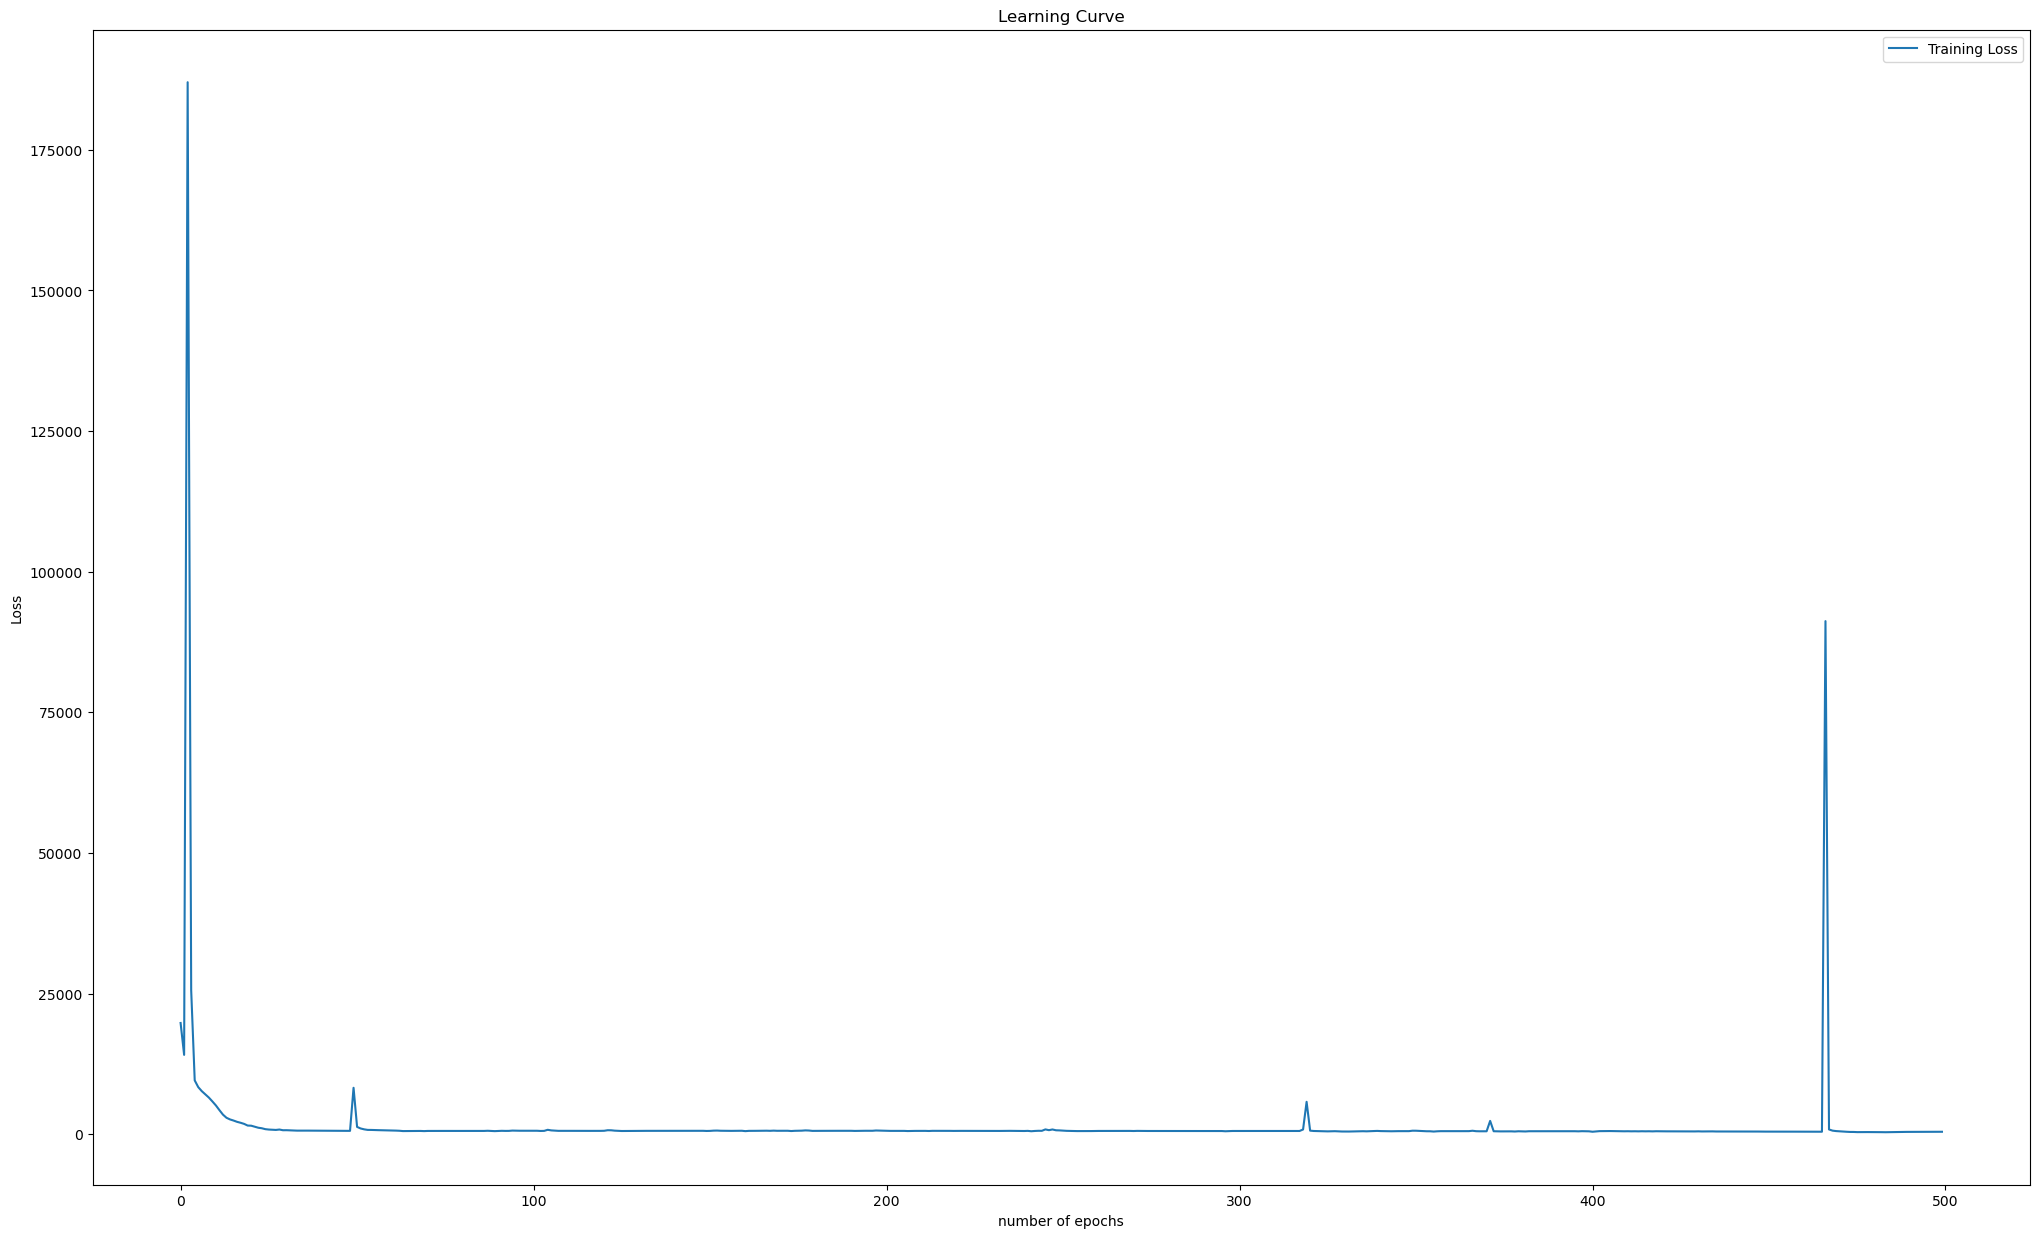

In [28]:
#STEP 11 : PLOTTING THE GRAPH OF LOSS VS EPOCHS

plt.figure(figsize = (25,15)) # creates a new figure for a Matplotlib plot
plt.plot([i for i in range(0,500)], TR_NTFX.history['loss']) #create a line plot
plt.title('Learning Curve') # to give title to graph
plt.xlabel('number of epochs') #label to x axis
plt.ylabel('Loss') #label to y axis
plt.legend(['Training Loss']) #adds a legend to the plot
plt.show() #display the graph

In [29]:
#STEP 12 : PREDICTING THE VALUES USING PREDICT FUNCTION
pred = model.predict(x_test)

16/16 [==============================] - 0s 4ms/step


In [30]:
 y_pred = pred.reshape(501,-1) # reshapes the pred array

In [31]:
y_pred = y_pred.mean(axis=1) #calculates the mean along axis 1

In [32]:
y_pred.shape #retrieve the shape of y_pred

(501,)

In [33]:
error =  mean_squared_error(y_test,y_pred, squared = False) #calculates the Root Mean Squared Error between the true labels and the predicted values
print('RMSE score on test dataset:',error) #Printing root mean square error

RMSE score on test dataset: 61.9972673831663


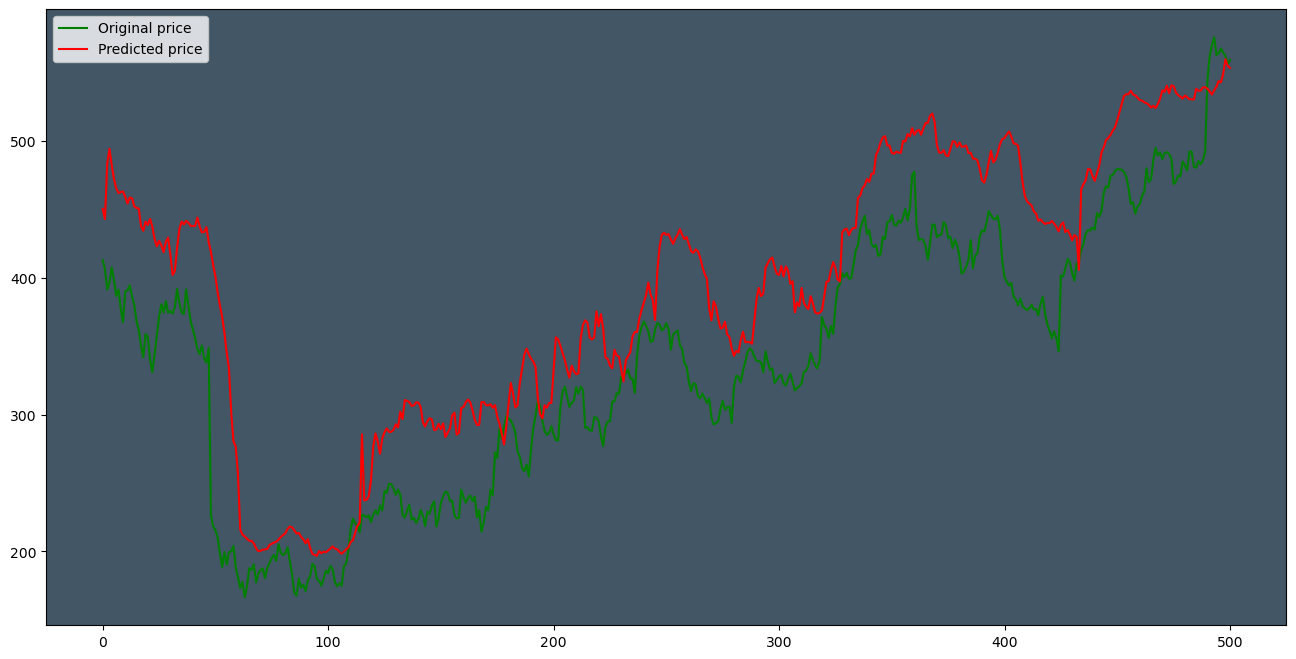

In [34]:
#STEP 13 : PLOTTING THE GRAPH OF ACTUAL AND PREDICTED VALUES TO SEE THE PERFORMANCE OF THE MODEL
fig, ax = plt.subplots(figsize=(16,8)) #creates a new Matplotlib figure and axes for a plot
ax.set_facecolor('#425666') #set color of axis
ax.plot(y_test, color='green', label='Original price') #create a line plot on the subplot represented by the ax
plt.plot(y_pred, color='red', label='Predicted price') #plotting the predicted prices
plt.legend()